# Classier Network Example: MINST Fashion
A simple example/test ClassifierNet object fund in NeuralNetworks, using classic example of the MNIST fashion data set: https://github.com/zalandoresearch/fashion-mnist

In [5]:
# Imports
import sys
sys.path.append('../')
from ClassifierNet import ClassifierNet
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
# Loading the fashion data set
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.fashion_mnist.load_data()

In [7]:
# Creating a key for the labels, to use in graphing etc.
label_key = {0:"T-Shirt/Top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",
    7:"Sneaker",8:"Bag",9:"Ankle boot"}

In [10]:
# Building the DNN using the ClassifierNet object.
# The arguments are: input dims (tuple), output dims (number of catagories),
# list of dense layers (a list of number of neurons in each layer)
net = ClassifierNet((28,28), 10, [784, 196, 196, 49])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
# Training the DNN
# Arguments are: training input (ndarray), training output (ndarray), batch size and epochs.
net.train(xtrain, ytrain, batch=5000, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 3s 43us/sample - loss: 41.7022 - acc: 0.2721
Epoch 2/20
60000/60000 [==============================] - 3s 43us/sample - loss: 4.4943 - acc: 0.6280
Epoch 3/20
60000/60000 [==============================] - 2s 40us/sample - loss: 2.1405 - acc: 0.6947
Epoch 4/20
60000/60000 [==============================] - 2s 40us/sample - loss: 1.3322 - acc: 0.7370
Epoch 5/20
60000/60000 [==============================] - 2s 40us/sample - loss: 1.0169 - acc: 0.7660
Epoch 6/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.9806 - acc: 0.7673
Epoch 7/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.8552 - acc: 0.7894
Epoch 8/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.9030 - acc: 0.7800
Epoch 9/20
60000/60000 [==============================] - 3s 47us/sample - loss: 0.7380 - acc: 0.8067
Epoch 10/20
60000/60000 [==============================] - 2s 41us/sample - loss:

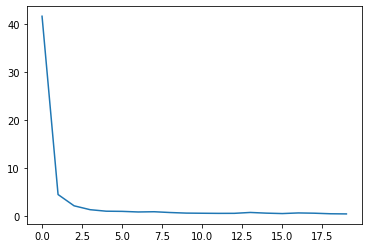

In [13]:
# Inspecting the Loss:
plt.plot(net.loss)

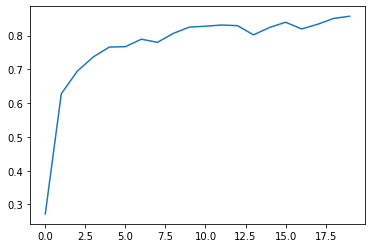

In [14]:
# Inspecting the Accuracy:
plt.plot(net.accuracy)

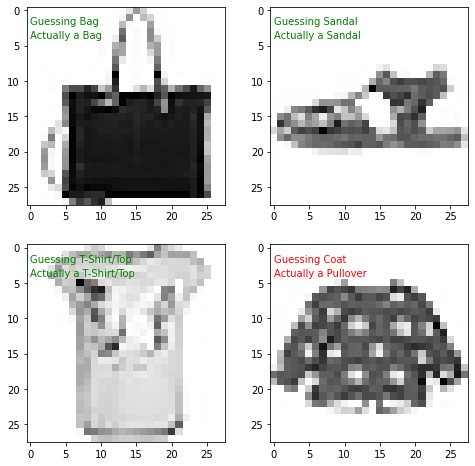

In [22]:
# Perhaps we wish to see what the DNN's guesses look like, so lets take a random
# sample of 4 of them, and display them along with what the guess is:
ims = np.random.randint(0, len(ytest), size=4)
guesses = net.predict(xtest[ims,:,:])
fig, axes = plt.subplots(2, 2, figsize=(8,8))
axs = [axes[0][0],axes[0][1],axes[1][0],axes[1][1]] # have to reindex them
for j in range(4):
    c = 'g' if guesses[j]==ytest[ims[j]] else 'r'
    axs[j].imshow(xtest[ims[j],:,:], cmap='Greys', interpolation='none')
    axs[j].text(0,2,"Guessing {}".format(label_key[guesses[j]]), color=c)
    axs[j].text(0,4,"Actually a {}".format(label_key[ytest[ims[j]]]), color=c)

Text(0, 0.5, 'Network Guess')

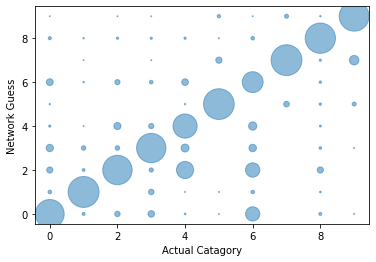

In [23]:
# We might reasonably wonder if the DNN has trouble distinguishing certain catagories
# or succeeds at disambiguating very different things, while failing to tell the
# difference between similar things. Let's examine this using a bubble plot:
yguess = net.predict(xtest)
bubbles = np.zeros((10,10))
for i in range(len(ytest)):
    bubbles[yguess[i],ytest[i]] += 1
x = np.linspace(0,9,num=10); y = np.linspace(0,9,num=10)
x, y = np.meshgrid(x, y)
plt.scatter(x.reshape(100),y.reshape(100),s=bubbles.reshape(100),alpha=0.5)
plt.xlabel("Actual Catagory")
plt.ylabel("Network Guess")

This does appear to be the case, seeing that "shirt" (catagory 6) is often mistaken by the network for a "t-shirt" (0) or "pullover" (2). Similarly, a "coat" is often mis-catagorized as a "pullover" (2). Meanwhile, it basically never mistakes a "sneaker" (7) for anything else, except occasionally an "ankle boot" (9). (I don't know if this will change with a re-training of the network - something else to experiment with.)